## INTEGRANTES
- KAMILA BELEN LEIVA MORALES
- MAURA DANIELA GONZALEZ SILVA
- RICARDO BASTIAN TORO MUNDACA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('logistica_data.xlsx')

In [37]:
data.head()

,AÑO,MES,REGION,CIUDAD,SECCION,NOMB SECCIÓN,CODBARRAS,CODIGO,DESCRP,CANTID,...,RAZON,DISTRI,CODNEG,VRCOST,VRVENT,TIPNEG,MARCA,NOMMAR,INDCODIFI,MARGEN
0,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030940,10112,SHAMPOO JOHNSON ORIGINAL 750cm3,4,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,56372,78000,SAO,2770,JOHNSON,C,21628
1,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030889,12884,SHAMPOO JOHNSON MANZANILLA 200cm3,40,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,279960,380725,SAO,2770,JOHNSON,C,100765
2,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030537,12886,SHAMPOO JOHNSON MANZANILLA 400cm3,27,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,273645,327074,SAO,2770,JOHNSON,C,53429
3,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030544,12888,SHAMPOO JOHNSON MANZANILLA 750cm3,7,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,98651,114600,SAO,2770,JOHNSON,C,15949
4,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010031046,22714,ACEITE JOHNSON ORIG 100 cm3,53,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,240779,360400,SAO,2770,JOHNSON,C,119621


In [38]:
data.columns

Index(['AÑO', 'MES', 'REGION', 'CIUDAD', 'SECCION', 'NOMB SECCIÓN',
       'CODBARRAS', 'CODIGO', 'DESCRP', 'CANTID', 'NITPRO', 'RAZON', 'DISTRI',
       'CODNEG', 'VRCOST', 'VRVENT', 'TIPNEG', 'MARCA', 'NOMMAR', 'INDCODIFI',
       'MARGEN'],
      dtype='object')

Top productos: 
 NOMB SECCIÓN
ASEO PERSONAL             2091163
COMPLEMENTARIOS DROG.       20814
ALIMENTOS NO ENFRIADOS       7660
DROGUERIA                    7342
PRODUCTOS HOGAR              4028
CUIDADO PERSONAL             1353
Name: CANTID, dtype: int64

Porcentaje vendido: 
 NOMB SECCIÓN
ASEO PERSONAL             98.068009
COMPLEMENTARIOS DROG.      0.976102
ALIMENTOS NO ENFRIADOS     0.359226
DROGUERIA                  0.344313
PRODUCTOS HOGAR            0.188899
CUIDADO PERSONAL           0.063451
Name: CANTID, dtype: float64


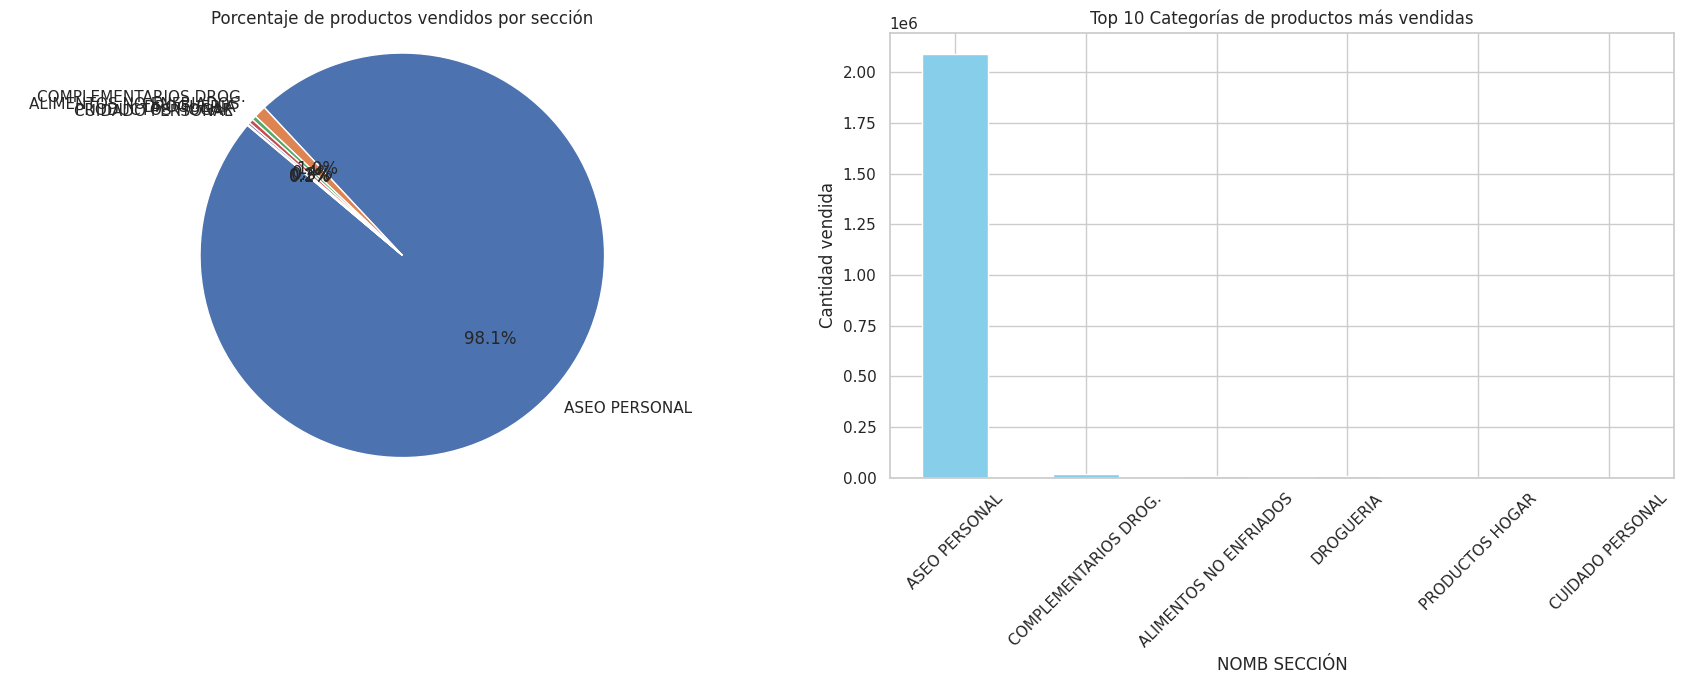

In [39]:
# Comparamos las categorias "NombSeccion" para ver la cantidad de las categorias de los articulos vendidos

top_productos = data.groupby('NOMB SECCIÓN')['CANTID'].sum().sort_values(ascending=False).head(10)
total_vendido = data['CANTID'].sum()
print("Top productos: \n", top_productos)
porcentaje_vendido = (top_productos / total_vendido) * 100
print("\nPorcentaje vendido: \n", porcentaje_vendido)
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de torta
axs[0].pie(porcentaje_vendido, labels=top_productos.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Porcentaje de productos vendidos por sección')
axs[0].axis('equal')

# Gráfico de barras
top_productos.plot(kind='bar', ax=axs[1], color='skyblue')
axs[1].set_title('Top 10 Categorías de productos más vendidas')
axs[1].set_xlabel('NOMB SECCIÓN')
axs[1].set_ylabel('Cantidad vendida')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Podemos ver que la categoría de "ASEO PERSONAL" es la categoría con mayores ventas por lejos, un 98,1% de los productos vendidos pertenecen a esta sección. 

El resto de secciones ocupan:

2. COMPLEMENTARIOS DROG.      0.97%
3. ALIMENTOS NO ENFRIADOS     0.35%
4. DROGUERIA                  0.34%
5. PRODUCTOS HOGAR            0.18%
6. CUIDADO PERSONAL           0.06%


DESCRP
JAB JOHNSON AVENA&ALMEND 125 g X3 P/ESP     82545
JAB JOHNSON BABY ORIG 125 g X3 P/ESP OF     66146
LISTERINE COOLMINT 180cm3                   52121
JAB JOHNSON ADULT GRANADA/UVA 125g X3       51771
JAB JOHNSON ORIG 125 g X 3 P/ESP OF         51155
JAB JOHNSON ADULT MIEL/LIANZA 125g X3       47401
ENJUAG BUC LISTERINE CTROL CALC+JAB X       45649
PROTEC DIARI CAREFREE ORIG C/PERFUM X 25    45073
JAB NEKO BLANCO 125g X3.                    44401
CEPILLO REACH JOHNSON 2X1 R/04596           43618
Name: CANTID, dtype: int64


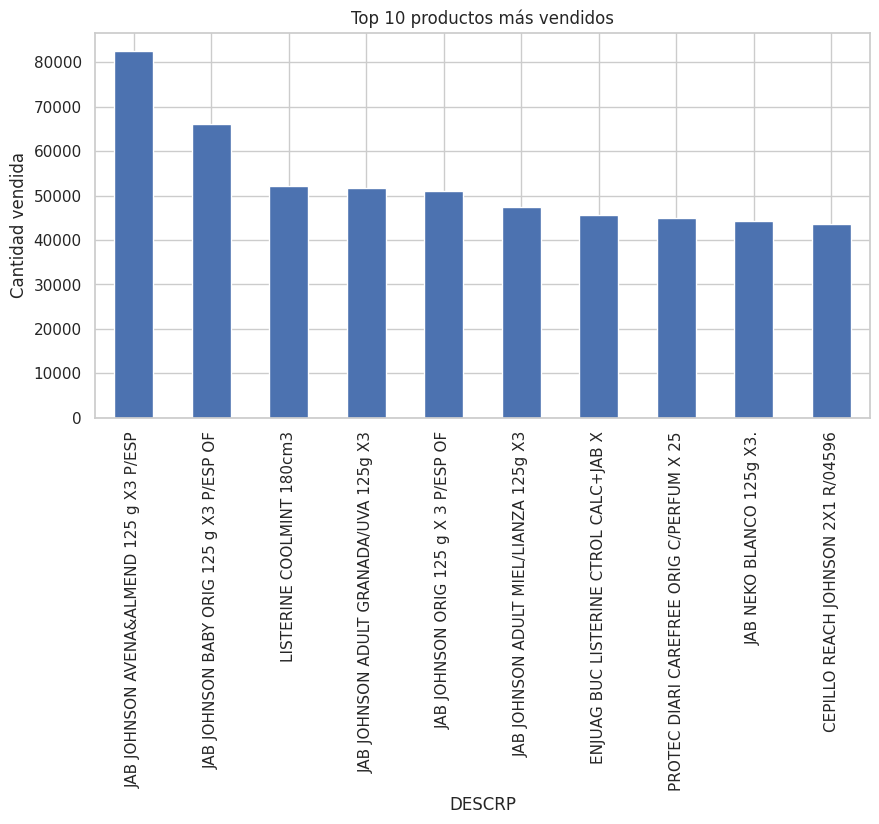

In [40]:
# Top 10 productos más vendidos
top_productos = data.groupby('DESCRP')['CANTID'].sum().sort_values(ascending=False).head(10) # Agrupamos por descripción del producto
print(top_productos)
top_productos.plot(kind='bar', figsize=(10,5), title='Top 10 productos más vendidos')
plt.ylabel('Cantidad vendida')
plt.show()

Acá podemos observar que se confirma el grafico anterior, los productos más vendidos son en su mayoría productos de "ASEO PERSONAL" como jabones o enjuagues bucales. Además podemos ver como algunas marcas se repiten, como lo es "JOHNSON" o "LISTERINE", indicando preferencia hacia esas marcas.

In [41]:
#Nos enfocamos en aseo personal, ya que es la más exitosa
data['NOMB SECCIÓN'] = data['NOMB SECCIÓN'].str.strip()
df_aseo = data[data['NOMB SECCIÓN'] == 'ASEO PERSONAL']
df_aseo.head(20)

,AÑO,MES,REGION,CIUDAD,SECCION,NOMB SECCIÓN,CODBARRAS,CODIGO,DESCRP,CANTID,...,RAZON,DISTRI,CODNEG,VRCOST,VRVENT,TIPNEG,MARCA,NOMMAR,INDCODIFI,MARGEN
0,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030940,10112,SHAMPOO JOHNSON ORIGINAL 750cm3,4,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,56372,78000,SAO,2770,JOHNSON,C,21628
1,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030889,12884,SHAMPOO JOHNSON MANZANILLA 200cm3,40,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,279960,380725,SAO,2770,JOHNSON,C,100765
2,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030537,12886,SHAMPOO JOHNSON MANZANILLA 400cm3,27,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,273645,327074,SAO,2770,JOHNSON,C,53429
3,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030544,12888,SHAMPOO JOHNSON MANZANILLA 750cm3,7,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,98651,114600,SAO,2770,JOHNSON,C,15949
4,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010031046,22714,ACEITE JOHNSON ORIG 100 cm3,53,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,240779,360400,SAO,2770,JOHNSON,C,119621
5,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030094,22877,SHAMPOO JOHNSON ORIGINAL 200cm3 03009,42,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,293958,401580,SAO,2770,JOHNSON,C,107622
6,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010030933,22880,SHAMPOO JOHNSON ORIGINAL 400cm3,29,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,277269,377720,SAO,2770,JOHNSON,C,100451
7,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010037192,23755,CREMA JOHNSON BABY ORIGINAL 400 cm3,2,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,27442,38200,SAO,2770,JOHNSON,C,10758
8,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010035617,23756,*D*CREMA JOHNSON BABY ORIGINAL 100cm3 03,2,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,6028,9000,SAO,2770,JOHNSON,D,2972
9,2017,1,BAQ,BAQ,31,ASEO PERSONAL,7891010037185,23757,CREMA JOHNSON BABY ORIGINAL 200cm3 3718,65,...,JOHNSON Y JOHNSON DE COLOMBIA S.A.,BAQ,1,534495,723200,SAO,2770,JOHNSON,C,188705


DESCRP
JAB JOHNSON AVENA&ALMEND 125 g X3 P/ESP     82545
JAB JOHNSON BABY ORIG 125 g X3 P/ESP OF     66146
LISTERINE COOLMINT 180cm3                   52121
JAB JOHNSON ADULT GRANADA/UVA 125g X3       51771
JAB JOHNSON ORIG 125 g X 3 P/ESP OF         51155
JAB JOHNSON ADULT MIEL/LIANZA 125g X3       47401
ENJUAG BUC LISTERINE CTROL CALC+JAB X       45649
PROTEC DIARI CAREFREE ORIG C/PERFUM X 25    45073
JAB NEKO BLANCO 125g X3.                    44401
CEPILLO REACH JOHNSON 2X1 R/04596           43618
Name: CANTID, dtype: int64


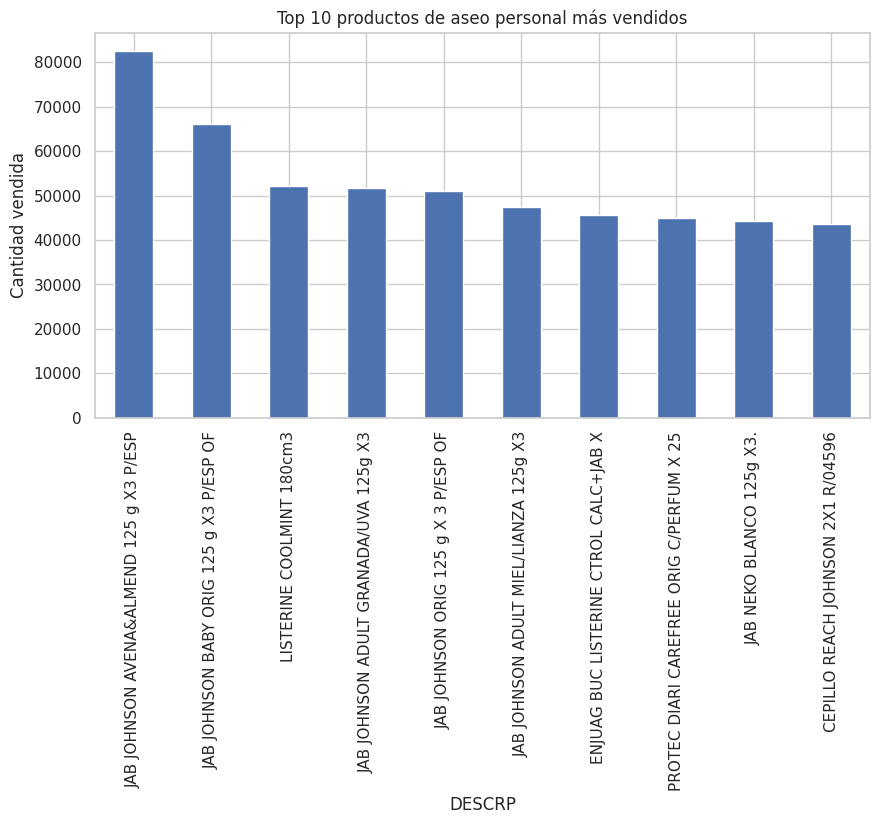

In [42]:
# De los productos de aseo personal, analizamos los 10 más vendidos
top_aseo = df_aseo.groupby('DESCRP')['CANTID'].sum().sort_values(ascending=False).head(10) # Agrupamos por descripción del producto
print(top_aseo)
top_aseo.plot(kind='bar', figsize=(10,5), title='Top 10 productos de aseo personal más vendidos')
plt.ylabel('Cantidad vendida')
plt.show()
plt.close()

Podemos ver que los 10 productos más vendidos a nivel general son los mismos 10 productos más vendidos de la categoría aseo personal,

Entre jabones de distintos tipos y enjuagues bucales abundan en el top.

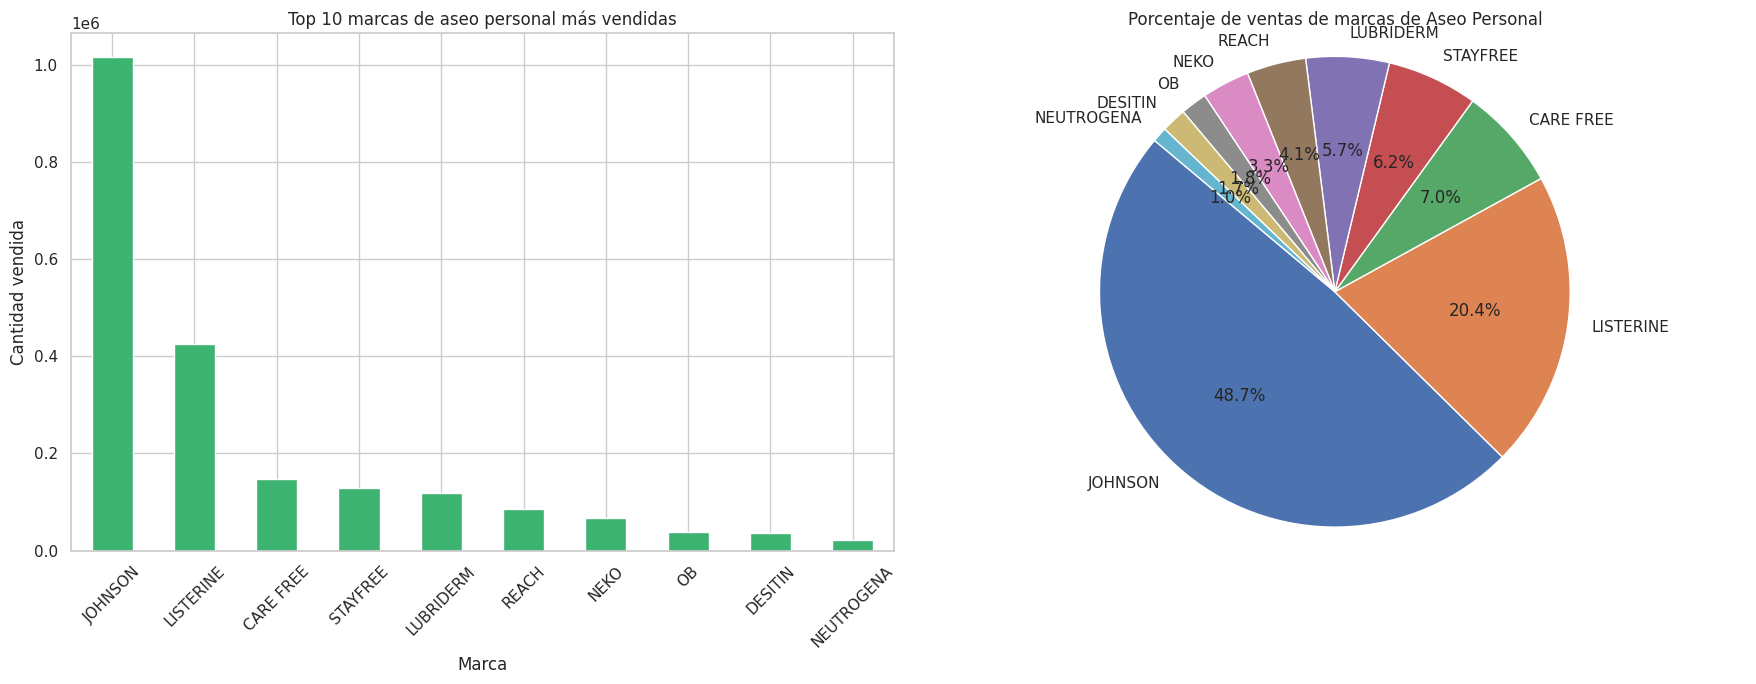

In [43]:
# Analizamos las marcas más vendidas de la sección de ASEO PERSONAL

top_marcas_aseo = df_aseo.groupby('NOMMAR')['CANTID'].sum().sort_values(ascending=False).head(10) # Agrupamos por nombre de marca
porcentaje_marcas_aseo = (top_marcas_aseo / top_marcas_aseo.sum()) * 100 # Calculamos el porcentaje de cada marca respecto al total de ventas de marcas de aseo personal

fig, axs = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico de barras
top_marcas_aseo.plot(kind='bar', ax=axs[0], color='mediumseagreen')
axs[0].set_title('Top 10 marcas de aseo personal más vendidas')
axs[0].set_ylabel('Cantidad vendida')
axs[0].set_xlabel('Marca')
axs[0].tick_params(axis='x', rotation=45)

# Gráfico de torta
axs[1].pie(porcentaje_marcas_aseo, labels=top_marcas_aseo.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Porcentaje de ventas de marcas de Aseo Personal')
axs[1].axis('equal')

plt.tight_layout()
plt.show()

Podemos ver que las 3 marcas más vendidas son "JOHNSON" con 1014881 ventas con un 48,7% de las ventas totales de los productos de ASEO PERSONAL, seguido de "LISTERINE" con 424571 ventas con un 20,4% de las ventas totales de la sección y finalmente peleando por el top 3 "CARE FREE" con 146766 ventas con un 7,0% de las ventas totales de la sección.

Vemos que "JOHNSON" y "LISTERINE" son las marcas que acumulan más del 60% de todas las ventas de ASEO PERSONAL, sin embargo "JOHNSON" ocupa casi un 50%.

Margen total por categoría: 
 NOMB SECCIÓN
ASEO PERSONAL             5181670497
COMPLEMENTARIOS DROG.       39693648
ALIMENTOS NO ENFRIADOS      30747261
DROGUERIA                   22913535
CUIDADO PERSONAL             4370928
PRODUCTOS HOGAR                 1247
Name: MARGEN, dtype: int64
NOMB SECCIÓN
ASEO PERSONAL             5181670497
COMPLEMENTARIOS DROG.       39693648
ALIMENTOS NO ENFRIADOS      30747261
DROGUERIA                   22913535
CUIDADO PERSONAL             4370928
PRODUCTOS HOGAR                 1247
Name: MARGEN, dtype: int64


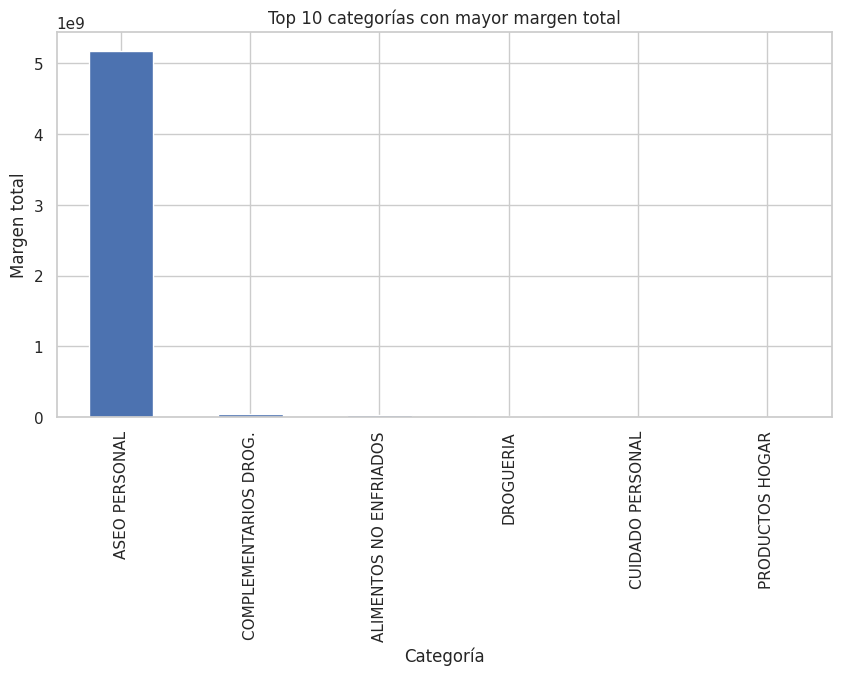

In [44]:
# Calcular el margen de ganancia por producto
data['MARGEN'] = data['VRVENT'] - data['VRCOST']

# Margen total por categoría
margen_categorias = data.groupby('NOMB SECCIÓN')['MARGEN'].sum().sort_values(ascending=False).head(10) # Agrupamos por sección y sumamos el margen
print("Margen total por categoría: \n", margen_categorias)
print(margen_categorias)
margen_categorias.plot(kind='bar', figsize=(10,5), title='Top 10 categorías con mayor margen total')
plt.ylabel('Margen total')
plt.xlabel('Categoría')
plt.show()

Calculamos un margen de ganancia MARGEN = VALORVENTA - COSTOPRODUCCION y vemos que los productos de "ASEO PERSONAL" son los que mayor margen tienen, o sea el coste de producción es mucho menor que el valor de venta, por ende la ganancia es mucho mayor en los productos de esta sección.

Margen total por producto: 
 DESCRP
ENJUAG BUC LISTERINE CTROL CALC+JAB X      121302829
JAB JOHNSON AVENA&ALMEND 125 g X3 P/ESP    112429702
CEPILLO REACH JOHNSON 2X1 R/04596          106050580
LISTERINE COOLMINT 500cm3 GTS 180 OFE       91960214
JAB JOHNSON BABY ORIG 125 g X3 P/ESP OF     90088536
LISTERINE COOLMINT 180cm3                   89937556
CREM ANTIPAÑAL DESITIN CREAMY 57 g          78391122
LISTERINE CONTROL CALCULO 180 cm3           77753116
JAB JOHNSON ORIG 125 g X 3 P/ESP OF         75616977
JAB JOHNSON ADULT GRANADA/UVA 125g X3       72456007
Name: MARGEN, dtype: int64


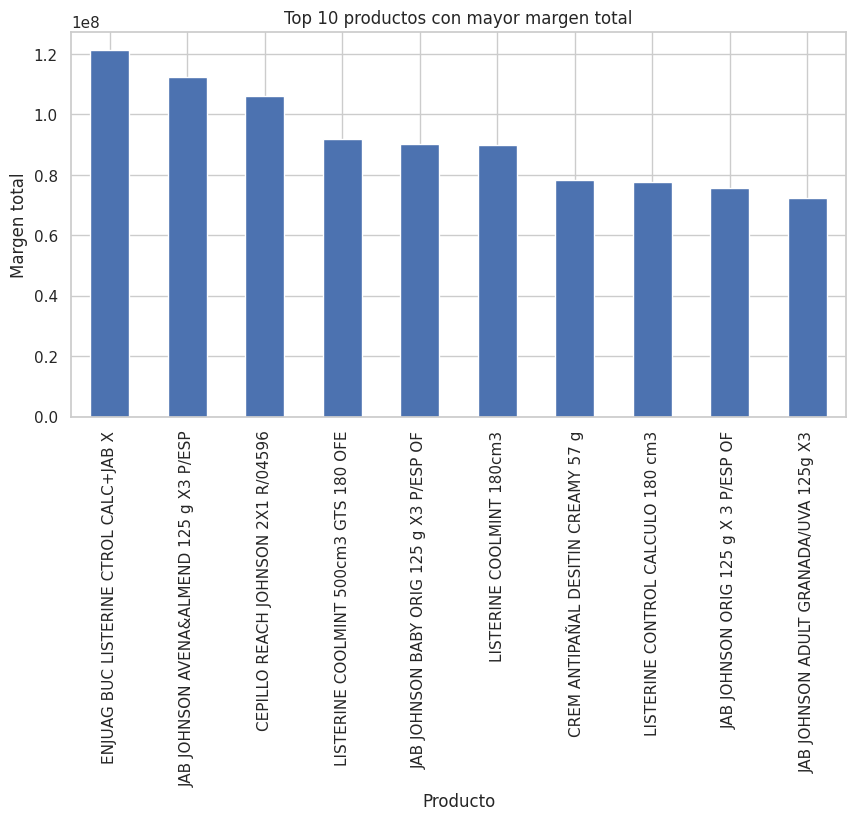

In [48]:
# Margen total por producto
margen_productos = data.groupby('DESCRP')['MARGEN'].sum().sort_values(ascending=False).head(10) # Agrupamos por descripción del producto y sumamos el margen
print("Margen total por producto: \n", margen_productos)
margen_productos.plot(kind='bar', figsize=(10,5), title='Top 10 productos con mayor margen total')
plt.ylabel('Margen total')
plt.xlabel('Producto')
plt.show()

Podemos ver que los productos con un mejor margen son "ENJUAG BUC LISTERINE CTROL CALC+JAB X" de la marca "LISTERINE", seguido de "JAB JOHNSON AVENA&ALMEND 125 g X3 P/ESP" de la marca "JOHNSON" y finalmente "CEPILLO REACH JOHNSON 2X1 R/04596" de la marca "JOHNSON".

En su mayoría los productos con mayor margen son jabones de distintas fragancias, enjuagues bucales y cepillos. O sea estos productos son baratos de hacer y tienes precios de venta altos.

# Conclusiones para un perfil de producto exitoso

Primero al analizar las secciones de productos más vendidos, podemos ver que claramente los articulos de aseo personal son los articulos más vendidos sin ninguna duda.

Profundizando en lo anterior, vemos que los productos más vendidos son jabones, enjuagues bucales y cepillos. Además estos productos poseen un alto margen de ganancia, requiriendo poca inversión en su fabricación y teniendo un alto precio de venta.

A partir de lo anterior podemos ver que las marcas más exitosas son *Johnson* y *Listerine* siendo lideres en los productos de aseo personal. *Johnson* es lider en la producción de jabones y cepillos abarcando casi un 50% del mercado de productos de aseo personal mientras que *Listerine* es lider en la producción de enjuagues bucales con casi un 20% del mercado de productos de aseo personal, cada uno es "experto" en su area de producción.


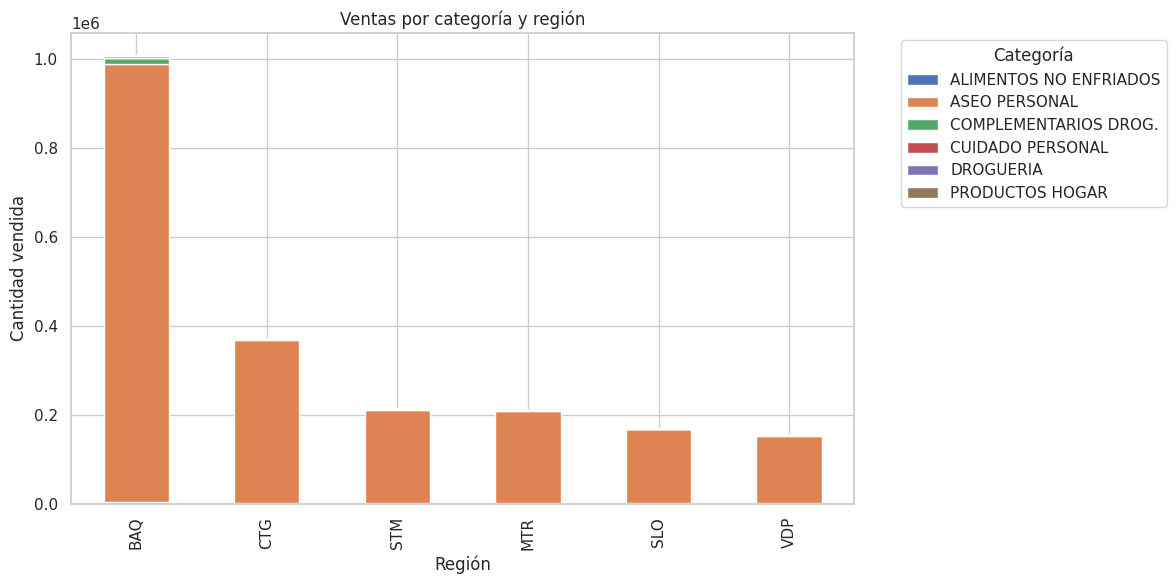

In [49]:
# Ventas totales por categoría y región
ventas_categoria_region = data.groupby(['REGION', 'NOMB SECCIÓN'])['CANTID'].sum().unstack().fillna(0) # Agrupamos por región y sección, luego hacemos un "unstack" para que las secciones sean columnas
ventas_categoria_region = ventas_categoria_region.reindex(ventas_categoria_region.sum(axis=1).sort_values(ascending=False).index) # Reordenamos las regiones por total de ventas

# Gráfico de barras apiladas por región
ventas_categoria_region.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Ventas por categoría y región')
plt.ylabel('Cantidad vendida')
plt.xlabel('Región')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos que las mayores cantidades de ventas se concentran en la region de "BAQ", la cual probablemente sea la región capital, además de que en todas las regiones los productos más vendidos son de "ASEO PERSONAL", se pueden priorizar ventas a la región de "BAQ" más que al resto de regiones, o por el contrario priorizar la venta a regiones, pues es posible que las bajas ventas en estas zonas sean causadas por poco abastecimiento pero que las demandas en estos territorios sean altas.

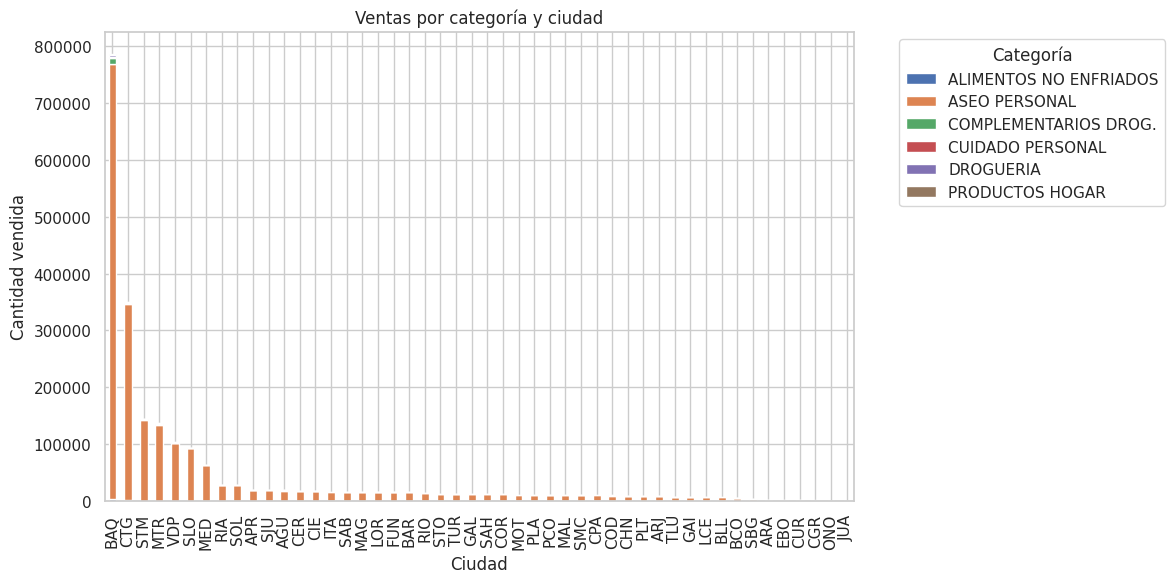

In [ ]:
# Ventas totales por categoría y ciudad
ventas_categoria_ciudad = data.groupby(['CIUDAD', 'NOMB SECCIÓN'])['CANTID'].sum().unstack().fillna(0) # Agrupamos por ciudad y sección, luego hacemos un "unstack" para que las secciones sean columnas
ventas_categoria_ciudad = ventas_categoria_ciudad.reindex(ventas_categoria_ciudad.sum(axis=1).sort_values(ascending=False).index) # Reordenamos las ciudades por total de ventas

# Gráfico de barras apiladas por ciudad
ventas_categoria_ciudad.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Ventas por categoría y ciudad')
plt.ylabel('Cantidad vendida')
plt.xlabel('Ciudad')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Podemos que las mayores cantidades de ventas se concentran en la ciudad de "BAQ" la cual probablemente sea la capital, seguido de las ciudades "CTG" y "STM". Se pueden priorizar venta a estas ciudades.

Al igual que con las regiones, si bien las mayores ventas se concentran en la capital, las ciudades de regiones puede que sufran de desabastecimiento y tengan altas demandas de estos productos

# Conclusiones para una estrategia de comercialización

Analizando las ventas por territorios, podemos trazar una estrategia de comercialización basada en vender productos de aseo personal y enfocarnos en algún territorio especifico. Por un lado la zona capital, la cual presenta altos volumenes de ventas, probablemente debido a su alta densidad poblacional. Por otra parte las regiones, las bajas ventas pueden deberse no necesariamente a un mal negocio, sino que pueden reflejar simplemente un menor abastecimiento y pueden tener una alta demanda.